# Note: This notebook is prepared in Google collab

# Loading Basic Libraries

In [1]:
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
# Creaking dataset folder  to download the dataset
mkdir dataset


In [3]:
# changing current directory path
cd dataset

/content/dataset


In [5]:
# Downloading the dataset
!kaggle datasets download -d nirmalsankalana/crop-pest-and-disease-detection

Dataset URL: https://www.kaggle.com/datasets/nirmalsankalana/crop-pest-and-disease-detection
License(s): CC0-1.0
100% 1.24G/1.25G [00:46<00:00, 31.4MB/s]
100% 1.25G/1.25G [00:46<00:00, 29.0MB/s]


In [6]:
# Unzipping the dataset
!unzip \*.zip


Streaming output truncated to the last 5000 lines.
  inflating: Tomato leaf blight/leaf blight1302_.jpg  
  inflating: Tomato leaf blight/leaf blight1303_.jpg  
  inflating: Tomato leaf blight/leaf blight1304_.jpg  
  inflating: Tomato leaf blight/leaf blight1305_.jpg  
  inflating: Tomato leaf blight/leaf blight1306_.jpg  
  inflating: Tomato leaf blight/leaf blight1307_.jpg  
  inflating: Tomato leaf blight/leaf blight1308_.jpg  
  inflating: Tomato leaf blight/leaf blight1309_.jpg  
  inflating: Tomato leaf blight/leaf blight130_.jpg  
  inflating: Tomato leaf blight/leaf blight1310_.jpg  
  inflating: Tomato leaf blight/leaf blight1311_.jpg  
  inflating: Tomato leaf blight/leaf blight1312_.jpg  
  inflating: Tomato leaf blight/leaf blight1313_.jpg  
  inflating: Tomato leaf blight/leaf blight1314_.jpg  
  inflating: Tomato leaf blight/leaf blight1315_.jpg  
  inflating: Tomato leaf blight/leaf blight1316_.jpg  
  inflating: Tomato leaf blight/leaf blight131_.jpg  
  inflating: Tom

In [ ]:
# Navigating back to content directory
cd '../'

# Some predifined functions

In [7]:
import matplotlib.pyplot as plt

def plot_graph(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 1 row and 2 columns

    # Plot training & validation accuracy values
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()


# Data Cleaning and filter valid image data

The given dataset contains some invalid images. The below code filters the dataset.

In [54]:
import os
import random
import shutil

# Set the source directory
src_dir = 'dataset'

# Set the destination directories
train_dir = 'train'
test_dir = 'test'
val_dir = 'val'

# Set the split ratios
train_ratio = 0.7
test_ratio = 0.2
val_ratio = 0.1

# Create the destination directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Get a list of all subdirectories in the source directory
subdirs = [d for d in os.listdir(src_dir) if os.path.isdir(os.path.join(src_dir, d))]

for subdir in subdirs:
    subdir_path = os.path.join(src_dir, subdir)
    image_files = [f for f in os.listdir(subdir_path) if f.endswith('.jpg') or f.endswith('.png')]

    print(f"Found {len(image_files)} image files in {subdir_path}")

    # If no image files found in the subdirectory, skip it
    if not image_files:
        print(f"No image files found in {subdir_path}. Skipping...")
        continue

    # Shuffle the list of image files
    random.shuffle(image_files)

    # Calculate the number of images for each set
    num_images = len(image_files)
    num_train = int(num_images * train_ratio)
    num_test = int(num_images * test_ratio)
    num_val = num_images - num_train - num_test

    # Create subdirectories for train, test, and val sets
    train_subdir = os.path.join(train_dir, subdir)
    test_subdir = os.path.join(test_dir, subdir)
    val_subdir = os.path.join(val_dir, subdir)

    os.makedirs(train_subdir, exist_ok=True)
    os.makedirs(test_subdir, exist_ok=True)
    os.makedirs(val_subdir, exist_ok=True)

    # Copy the images to their respective sets
    train_files = image_files[:num_train]
    test_files = image_files[num_train:num_train+num_test]
    val_files = image_files[num_train+num_test:]

    for file in train_files:
        src_path = os.path.join(subdir_path, file)
        dst_path = os.path.join(train_subdir, file)
        shutil.copy(src_path, dst_path)

    for file in test_files:
        src_path = os.path.join(subdir_path, file)
        dst_path = os.path.join(test_subdir, file)
        shutil.copy(src_path, dst_path)

    for file in val_files:
        src_path = os.path.join(subdir_path, file)
        dst_path = os.path.join(val_subdir, file)
        shutil.copy(src_path, dst_path)

    print(f"Copied {num_train} images to {train_subdir}")
    print(f"Copied {num_test} images to {test_subdir}")
    print(f"Copied {num_val} images to {val_subdir}")


Found 392 image files in dataset/Cashew gumosis
Copied 274 images to train/Cashew gumosis
Copied 78 images to test/Cashew gumosis
Copied 40 images to val/Cashew gumosis
Found 673 image files in dataset/Maize grasshoper
Copied 471 images to train/Maize grasshoper
Copied 134 images to test/Maize grasshoper
Copied 68 images to val/Maize grasshoper
Found 1368 image files in dataset/Cashew healthy
Copied 957 images to train/Cashew healthy
Copied 273 images to test/Cashew healthy
Copied 138 images to val/Cashew healthy
Found 1015 image files in dataset/Cassava green mite
Copied 710 images to train/Cassava green mite
Copied 203 images to test/Cassava green mite
Copied 102 images to val/Cassava green mite
Found 948 image files in dataset/Maize leaf beetle
Copied 663 images to train/Maize leaf beetle
Copied 189 images to test/Maize leaf beetle
Copied 96 images to val/Maize leaf beetle
Found 1205 image files in dataset/Cassava mosaic
Copied 843 images to train/Cassava mosaic
Copied 241 images to

In [10]:
# Function to check if an image is valid using OpenCV
def is_image_valid(image_path):
    try:
        img = cv2.imread(image_path)
        if img is None:
            return False
        return True
    except:
        return False

# Function to filter out corrupted images
def filter_and_save_valid_images(source_dir, target_dir):
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    for root, _, files in os.walk(source_dir):
        for file in files:
            file_path = os.path.join(root, file)
            if is_image_valid(file_path):
                relative_path = os.path.relpath(file_path, source_dir)
                target_path = os.path.join(target_dir, relative_path)
                target_subdir = os.path.dirname(target_path)
                if not os.path.exists(target_subdir):
                    os.makedirs(target_subdir)
                cv2.imwrite(target_path, cv2.imread(file_path))

# Specify the source and target directories
train_source_dir = 'train'
train_target_dir = 'filtered_train'
val_source_dir = 'val'
val_target_dir = 'filtered_val'
test_source_dir = 'test'
test_target_dir = 'filtered_test'

# Filter and save valid images
filter_and_save_valid_images(train_source_dir, train_target_dir)
filter_and_save_valid_images(val_source_dir, val_target_dir)
filter_and_save_valid_images(test_source_dir, test_target_dir)


# Loading the dataset

In [11]:

# Function to load and preprocess the dataset
def load_and_preprocess_dataset(directory, image_size=(150, 150), batch_size=32):
    dataset = tf.keras.utils.image_dataset_from_directory(
        directory=directory,
        labels='inferred',
        label_mode='categorical',
        batch_size=batch_size,
        image_size=image_size)

    class_names = dataset.class_names

    # Define a preprocessing function to scale the images
    def preprocess(image, label):
        # Rescale the image pixel values from [0, 255] to [0, 1]
        image = tf.cast(image, tf.float32) / 255.0
        return image, label

    # Apply the preprocessing function to the dataset
    dataset = dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    return dataset, class_names

# Load the datasets
train_ds, train_class_names = load_and_preprocess_dataset(train_target_dir)
val_ds, val_class_names = load_and_preprocess_dataset(val_target_dir)

# Ensure the class names are consistent
assert train_class_names == val_class_names, "Class names in training and validation datasets do not match."

# Prefetching to improve performance
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)


Found 17605 files belonging to 22 classes.
Found 2538 files belonging to 22 classes.


In [12]:
test_ds, test_class_names = load_and_preprocess_dataset(test_target_dir)
test_ds = test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)


Found 5027 files belonging to 22 classes.


# ANN model

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
ann_model = models.Sequential([
    layers.Flatten(input_shape=(150,150,3)),         # Input layer flattens the image
    layers.Dense(512, activation='relu'),            # Hidden layer with 512 units and ReLU activation
    layers.Dense(256, activation='relu'),            # Hidden layer with 256 units and ReLU activation
    layers.Dense(22, activation='softmax')  # Output layer with softmax activation for classification
])

# Compile the model
ann_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 67500)             0         
                                                                 
 dense (Dense)               (None, 512)               34560512  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 22)                5654      
                                                                 
Total params: 34697494 (132.36 MB)
Trainable params: 34697494 (132.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
ann_history= ann_model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
551/551 [==============================] - 32s 56ms/step - loss: 2.5090 - accuracy: 0.2331 - val_loss: 2.4573 - val_accuracy: 0.2368
Epoch 2/10
551/551 [==============================] - 35s 62ms/step - loss: 2.2748 - accuracy: 0.2769 - val_loss: 2.1671 - val_accuracy: 0.3073
Epoch 3/10
551/551 [==============================] - 31s 55ms/step - loss: 2.1548 - accuracy: 0.3088 - val_loss: 2.1161 - val_accuracy: 0.3180
Epoch 4/10
551/551 [==============================] - 29s 51ms/step - loss: 2.0701 - accuracy: 0.3264 - val_loss: 2.0176 - val_accuracy: 0.3416
Epoch 5/10
551/551 [==============================] - 29s 52ms/step - loss: 2.0042 - accuracy: 0.3417 - val_loss: 2.0083 - val_accuracy: 0.3424
Epoch 6/10
551/551 [==============================] - 28s 51ms/step - loss: 1.9771 - accuracy: 0.3518 - val_loss: 1.9500 - val_accuracy: 0.3660
Epoch 7/10
551/551 [==============================] - 29s 51ms/step - loss: 1.9136 - accuracy: 0.3694 - val_loss: 1.8914 - val_accuracy:

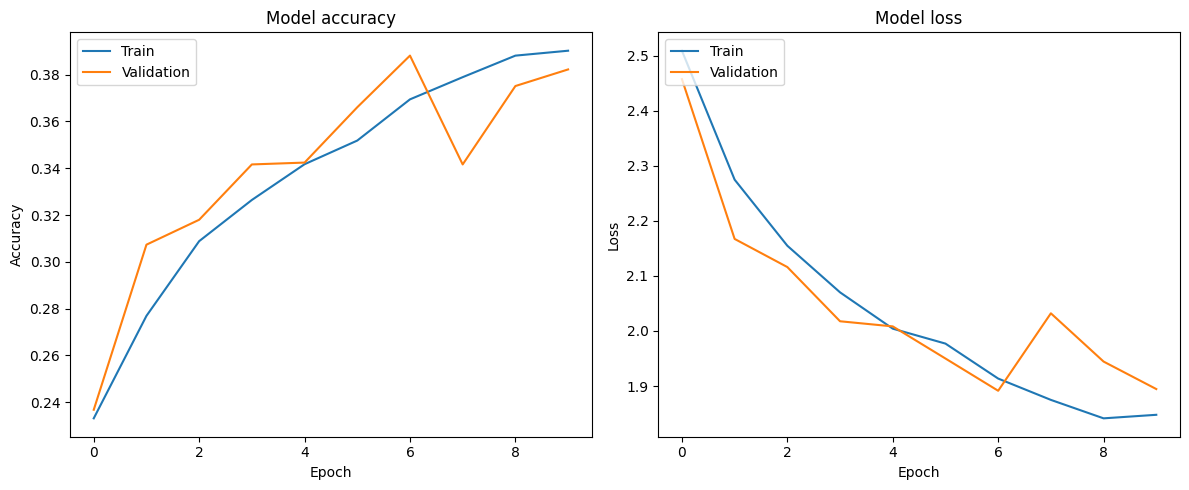

In [ ]:
plot_graph(ann_history)

# Basic CNN model

In [ ]:
from keras.optimizers import Adam

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model with batch normalization
cnn_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.75),
    layers.Dense(22, activation='softmax')
])


# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Display the model summary
cnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                      

In [ ]:
cnn_history = cnn_model.fit(
    train_ds,
    validation_data=val_ds,

    epochs=10  # Adjust the number of epochs based on your requirements
)



Epoch 1/10
551/551 [==============================] - 46s 64ms/step - loss: 3.2072 - accuracy: 0.2810 - val_loss: 2.7506 - val_accuracy: 0.2116
Epoch 2/10
551/551 [==============================] - 35s 63ms/step - loss: 2.0666 - accuracy: 0.4187 - val_loss: 1.9861 - val_accuracy: 0.4283
Epoch 3/10
551/551 [==============================] - 36s 65ms/step - loss: 1.5801 - accuracy: 0.5168 - val_loss: 1.7026 - val_accuracy: 0.4803
Epoch 4/10
551/551 [==============================] - 37s 67ms/step - loss: 1.3267 - accuracy: 0.5757 - val_loss: 1.1292 - val_accuracy: 0.6340
Epoch 5/10
551/551 [==============================] - 38s 69ms/step - loss: 1.1433 - accuracy: 0.6254 - val_loss: 1.0762 - val_accuracy: 0.6466
Epoch 6/10
551/551 [==============================] - 35s 64ms/step - loss: 1.0291 - accuracy: 0.6573 - val_loss: 1.1473 - val_accuracy: 0.6399
Epoch 7/10
551/551 [==============================] - 35s 62ms/step - loss: 0.9183 - accuracy: 0.6904 - val_loss: 0.9613 - val_accuracy:

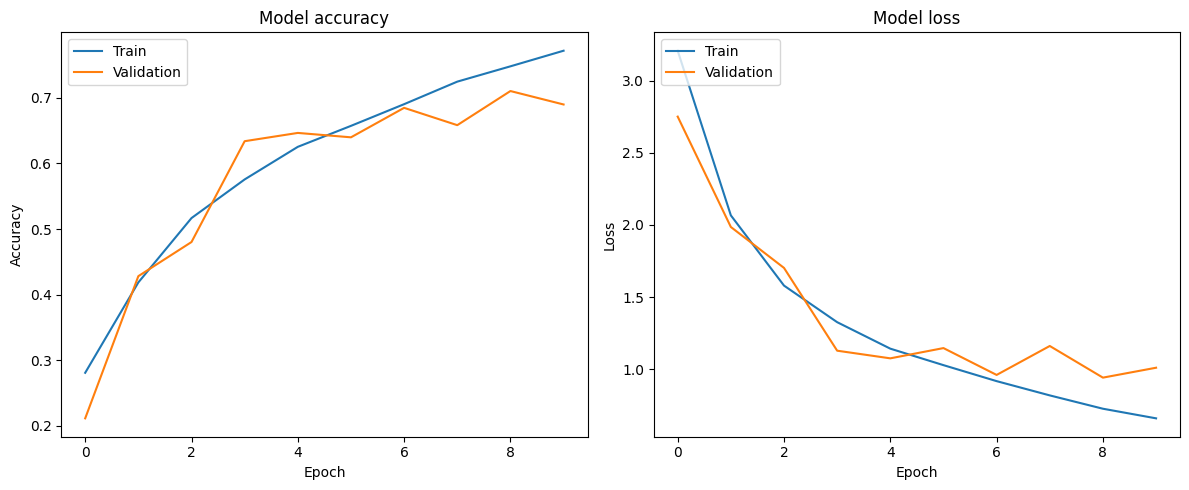

In [ ]:
plot_graph(cnn_history)

# Resnet(Basic)


In [13]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D , Dropout
from tensorflow.keras.optimizers import Adam


In [14]:
base_model = ResNet50(weights='imagenet', include_top=False)

for layer in base_model.layers[-10:]:
    layer.trainable = True

# Add new top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(22, activation='softmax')(x)

res_model = Model(inputs=base_model.input, outputs=predictions)


# Re-compile the model
res_model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


94765736/94765736 [==============================] - 3s 0us/step


In [15]:
resnet_history= res_model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
551/551 [==============================] - 150s 201ms/step - loss: 1.3461 - accuracy: 0.6010 - val_loss: 3.0756 - val_accuracy: 0.0867
Epoch 2/10
551/551 [==============================] - 104s 188ms/step - loss: 0.5116 - accuracy: 0.8258 - val_loss: 0.5763 - val_accuracy: 0.8042
Epoch 3/10
551/551 [==============================] - 110s 200ms/step - loss: 0.3162 - accuracy: 0.8965 - val_loss: 0.4449 - val_accuracy: 0.8479
Epoch 4/10
551/551 [==============================] - 104s 189ms/step - loss: 0.2023 - accuracy: 0.9386 - val_loss: 0.4379 - val_accuracy: 0.8522
Epoch 5/10
551/551 [==============================] - 104s 187ms/step - loss: 0.1295 - accuracy: 0.9632 - val_loss: 0.4506 - val_accuracy: 0.8542
Epoch 6/10
551/551 [==============================] - 104s 187ms/step - loss: 0.0870 - accuracy: 0.9776 - val_loss: 0.4571 - val_accuracy: 0.8601
Epoch 7/10
551/551 [==============================] - 104s 188ms/step - loss: 0.0579 - accuracy: 0.9848 - val_loss: 0.4730 -

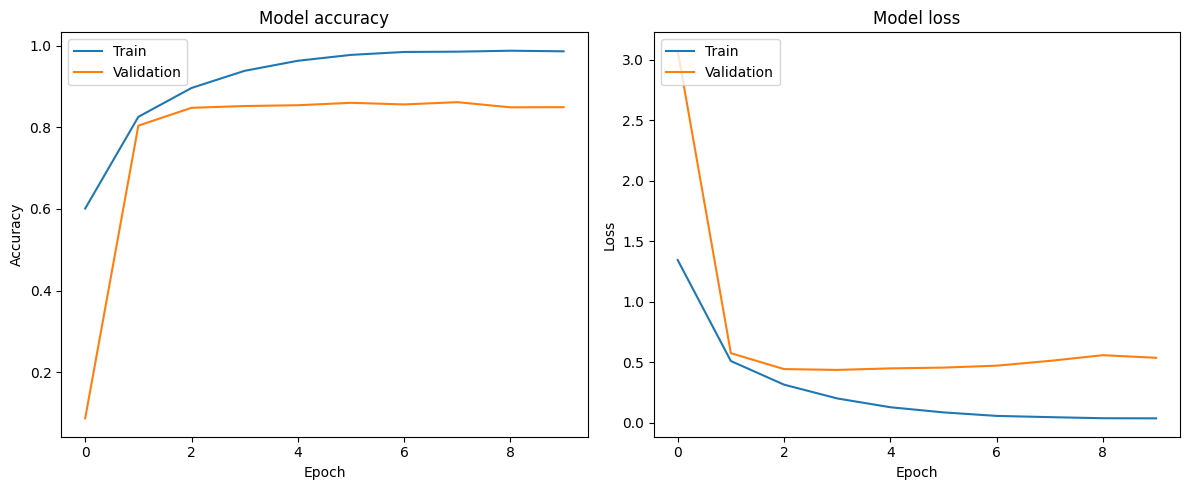

In [41]:
plot_graph(resnet_history)

# ResNet(Perfect) with Data Augumentaion and Regularizations

In [25]:
# Data augmentaion
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    'filtered_train',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

val_generator = datagen.flow_from_directory(
    'filtered_val',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 17605 images belonging to 22 classes.
Found 2538 images belonging to 22 classes.


In [27]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


In [31]:
# Load the base model
base_model = ResNet50(weights='imagenet', include_top=False)

# Make the last 10 layers trainable
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Add new top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  # Adding dropout for regularization
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)
x = Dropout(0.5)(x)  # Adding another dropout layer for regularization
predictions = Dense(22, activation='softmax', kernel_regularizer=l2(0.01))(x)

res_model_perfect = Model(inputs=base_model.input, outputs=predictions)

# Re-compile the model
res_model_perfect.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
res_model_perfect_history = res_model_perfect.fit(train_generator, epochs=5, validation_data=val_generator, callbacks=[early_stopping])


Epoch 1/5
551/551 [==============================] - 218s 342ms/step - loss: 16.7730 - accuracy: 0.2183 - val_loss: 15.0907 - val_accuracy: 0.5839
Epoch 2/5
551/551 [==============================] - 187s 339ms/step - loss: 15.0545 - accuracy: 0.5087 - val_loss: 14.0818 - val_accuracy: 0.7206
Epoch 3/5
551/551 [==============================] - 187s 339ms/step - loss: 14.0944 - accuracy: 0.6330 - val_loss: 13.3983 - val_accuracy: 0.7545
Epoch 4/5
551/551 [==============================] - 189s 343ms/step - loss: 13.3619 - accuracy: 0.6914 - val_loss: 12.7492 - val_accuracy: 0.7888
Epoch 5/5
551/551 [==============================] - 192s 349ms/step - loss: 12.6688 - accuracy: 0.7296 - val_loss: 12.1332 - val_accuracy: 0.8081


In [33]:
res_model_perfect_history1 = res_model_perfect.fit(train_generator, initial_epoch=5,epochs=10, validation_data=val_generator, callbacks=[early_stopping])

Epoch 6/10
551/551 [==============================] - 189s 344ms/step - loss: 11.9784 - accuracy: 0.7541 - val_loss: 11.4686 - val_accuracy: 0.8282
Epoch 7/10
551/551 [==============================] - 189s 342ms/step - loss: 11.3271 - accuracy: 0.7718 - val_loss: 10.8296 - val_accuracy: 0.8294
Epoch 8/10
551/551 [==============================] - 191s 347ms/step - loss: 10.6584 - accuracy: 0.7876 - val_loss: 10.2008 - val_accuracy: 0.8373
Epoch 9/10
551/551 [==============================] - 192s 347ms/step - loss: 10.0059 - accuracy: 0.8040 - val_loss: 9.6002 - val_accuracy: 0.8408
Epoch 10/10
551/551 [==============================] - 194s 352ms/step - loss: 9.3686 - accuracy: 0.8173 - val_loss: 8.9783 - val_accuracy: 0.8455


# VGG16 Model

In [19]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [20]:

# Load the base model
base_model = VGG16(weights='imagenet', include_top=False)

# Make more layers trainable
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Add new top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(22, activation='softmax')(x)

# Create the final model
vgg_model = Model(inputs=base_model.input, outputs=predictions)

vgg_model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

vgg_model.summary()



58889256/58889256 [==============================] - 2s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                            

In [21]:
vgg_history= vgg_model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
551/551 [==============================] - 148s 239ms/step - loss: 1.2364 - accuracy: 0.5985 - val_loss: 0.7437 - val_accuracy: 0.7360
Epoch 2/10
551/551 [==============================] - 123s 223ms/step - loss: 0.5993 - accuracy: 0.7848 - val_loss: 0.6208 - val_accuracy: 0.7683
Epoch 3/10
551/551 [==============================] - 128s 232ms/step - loss: 0.4672 - accuracy: 0.8295 - val_loss: 0.5241 - val_accuracy: 0.8081
Epoch 4/10
551/551 [==============================] - 128s 232ms/step - loss: 0.3806 - accuracy: 0.8620 - val_loss: 0.4916 - val_accuracy: 0.8140
Epoch 5/10
551/551 [==============================] - 124s 224ms/step - loss: 0.3119 - accuracy: 0.8891 - val_loss: 0.5329 - val_accuracy: 0.8069
Epoch 6/10
551/551 [==============================] - 124s 224ms/step - loss: 0.2599 - accuracy: 0.9063 - val_loss: 0.5281 - val_accuracy: 0.8128
Epoch 7/10
551/551 [==============================] - 123s 223ms/step - loss: 0.2171 - accuracy: 0.9225 - val_loss: 0.5258 -

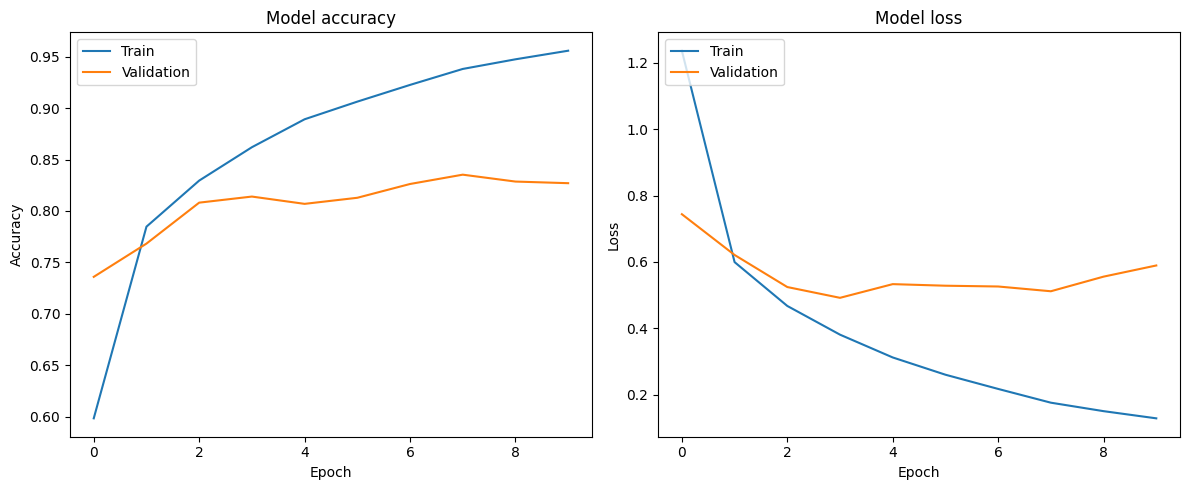

In [24]:
plot_graph(vgg_history)

# Model Evaluation and Best model Testing

In [ ]:
loss_ann, accuracy_ann = ann_model.evaluate(test_ds)
print(f"ANN Test accuracy: {accuracy_ann * 100:.2f}%")


157/157 [==============================] - 7s 38ms/step - loss: 1.8495 - accuracy: 0.3898
ANN Test accuracy: 38.98%


In [ ]:
loss_cnn, accuracy_cnn = cnn_model.evaluate(test_ds)
print(f"CNN Test accuracy: {accuracy_cnn * 100:.2f}%")


157/157 [==============================] - 9s 53ms/step - loss: 0.9678 - accuracy: 0.6992
CNN Test accuracy: 69.92%


In [17]:
loss_res, accuracy_res = res_model.evaluate(test_ds)
print(f"ResNet Test accuracy: {accuracy_res * 100:.2f}%")



158/158 [==============================] - 9s 57ms/step - loss: 0.5548 - accuracy: 0.8562
ResNet Test accuracy: 85.62%


In [37]:

loss_vgg16, accuracy_vgg16 = vgg_model.evaluate(test_ds)
print(f"VGG16 Test accuracy: {accuracy_vgg16 * 100:.2f}%")


158/158 [==============================] - 11s 70ms/step - loss: 0.5903 - accuracy: 0.8303
VGG16 Test accuracy: 83.03%


In [56]:
# Preparing test data for Renset Perfect model
test_generator = datagen.flow_from_directory(
    'filtered_test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 5027 images belonging to 22 classes.


In [55]:
loss_res_model_perfect, accuracy_res_model_perfect = res_model_perfect.evaluate(test_generator)
print(f"ResNet(Perfect) Test accuracy: {accuracy_res_model_perfect * 100:.2f}%")

158/158 [==============================] - 47s 299ms/step - loss: 8.9857 - accuracy: 0.8472
ResNet(Perfect) Test accuracy: 84.72%


# Tabulating the Model and it's Accuracy

                            |   Model Name    | Accuracy (%) |
                            |-----------------|--------------|
                            | ANN             | 38.98        |
                            | CNN             | 69.92        |
                            | VGG16           | 83.03        |
                            | ResNet          | 85.62        |
                            | ResNet(Perfect) | 84.58        |

- The ResNet(Perfect) model is chosen as the optimal model due to its balance of high accuracy and reduced overfitting, making it the best candidate for deployment. While the standard ResNet model achieved the highest accuracy, its overfitting issues could compromise its performance on new, unseen data. Therefore, for practical applications where generalization is crucial, the ResNet(Perfect) model is the preferred choice
